In [ ]:
#Reading

import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive
import glob
import os


In [ ]:
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:

for classid in os.listdir("spectrograms"):
  path_to_class = f"spectrograms/{classid}"
  print(classid)

5
4
6
1
7
8
9
3
0
2


In [ ]:
img1 = cv2.imread("spectrograms/2/84143-2-0-38.png", 0) #0 otomatik grayscale şeklinde kaydediyor.
img1

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
images = []

number_of_processed = 0
number_of_errors = 0

for classid in os.listdir("spectrograms"):
  path_to_class = f"spectrograms/{classid}"
  for image in os.listdir(path_to_class):

    try:

      path_to_image = f"{path_to_class}/{image}"
      img = cv2.imread(path_to_image, 0) # oradaki 0 gray scale için
      img = cv2.resize(img,(128, 128)) # önemli bir nokta çünkü elindeki fotoğrafın büyüklüğünü bilmezsin, ve zaman kaybı yaşayabilirsin.
      img = img/255 #normalization
      images.append([img, int(classid)])
      #print(path_to_image)

    except:
      number_of_errors += 1

    finally:
      number_of_processed +=1

    print(f"\rProcessed: {number_of_processed} / Errors: {number_of_errors}", end="")
  #print(type(classid))son çıktı 8732 tane olmalı
  #

Processed: 8732 / Errors: 0

In [ ]:
images[0][1]

5

In [ ]:
import random

for i in range(10):
  random.shuffle(images)

In [ ]:
for i in range(10):
  print(images[i][1])

5
7
5
3
4
2
9
9
2
7


In [ ]:
x = []
y = []

for image, classid in images:
  x.append(image)
  y.append(classid)

print(len(x))
print(len(y))

8732
8732


In [ ]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=1)


print(len(x_train))
print(len(x_test))
print(len(x_val))

6985
873
874


In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)

x_train.shape

(6985, 128, 128)

In [ ]:
x_train = x_train.reshape(-1, 128, 128, 1)
x_val = x_val.reshape(-1, 128, 128, 1)
x_test = x_test.reshape(-1, 128, 128, 1)

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
type(model)

keras.src.engine.sequential.Sequential

In [ ]:
model = tf.keras.Sequential()

number_of_nodes = [32, 64, 128, 256]
number_of_dense_layers = [2, 3, 4, 5]
models = []
history = []

for node in number_of_nodes:
  for layer_d in number_of_dense_layers:
    # feature extraction
    model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = "same", input_shape=(128,128,1)))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = "same", activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), strides = (2,2), padding = "same", activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Flatten())


    #classification
    for i in range(layer_d):
      model.add(tf.keras.layers.Dense(node, activation="relu"))
      model.add(tf.keras.layers.Dropout(0.5))


    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.summary()
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    history.append(model.fit(x_train, y_train, epochs = 50, validation_data = (x_val, y_val)))

    models.append(model)
    model = tf.keras.Sequential()


Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_154 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_153 (MaxPool  (None, 32, 32, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_155 (Conv2D)         (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_154 (MaxPool  (None, 8, 8, 32)          0         
 ing2D)                                                          
                                                                 
 conv2d_156 (Conv2D)         (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_155 (MaxPool  (None, 2, 2, 32)        

28/28 [==============================] - 0s 3ms/step - loss: 0.8230 - accuracy: 0.8236
model_1 loss: 0.8230053186416626 / accuracy: 0.8235967755317688



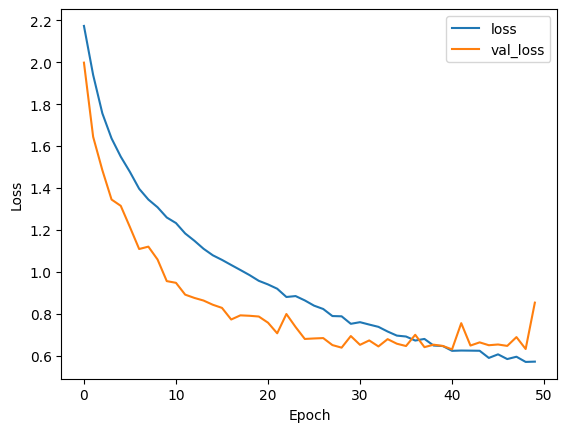

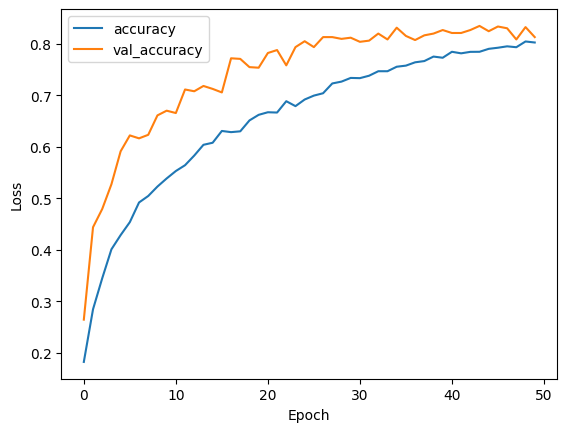

28/28 [==============================] - 0s 4ms/step - loss: 1.1644 - accuracy: 0.6552
model_2 loss: 1.164437174797058 / accuracy: 0.6552119255065918



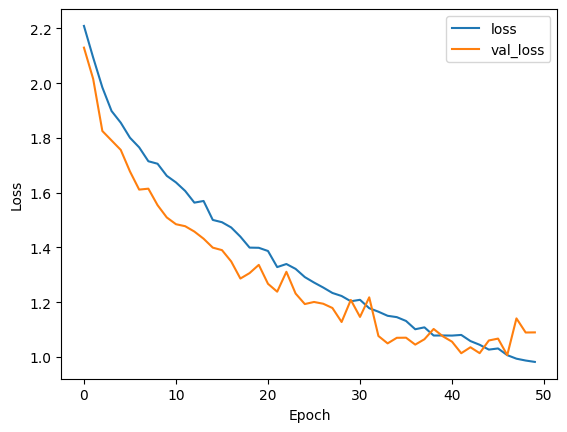

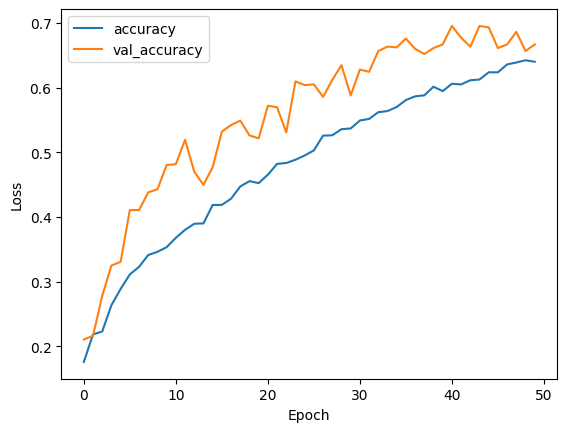

28/28 [==============================] - 0s 4ms/step - loss: 1.7207 - accuracy: 0.4662
model_3 loss: 1.7206941843032837 / accuracy: 0.46620848774909973



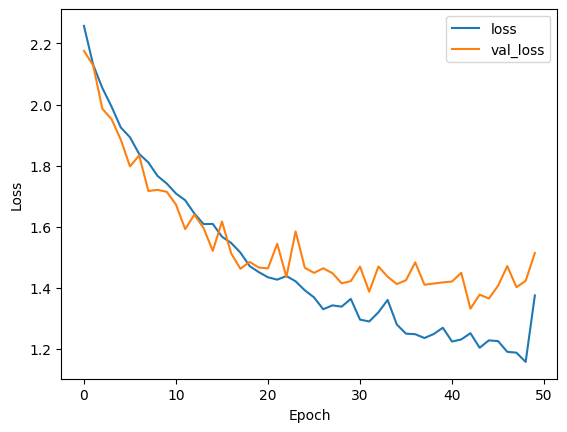

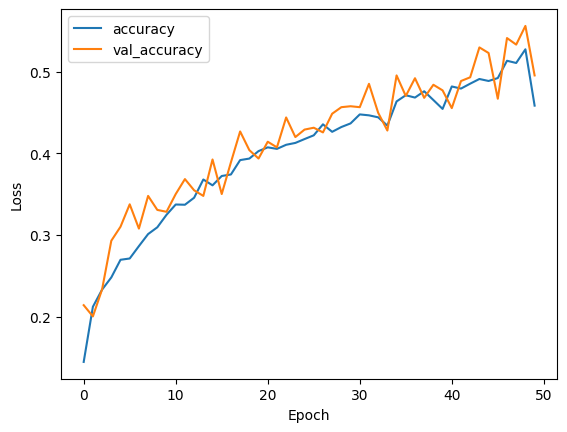

28/28 [==============================] - 0s 3ms/step - loss: 1.5514 - accuracy: 0.3402
model_4 loss: 1.5514074563980103 / accuracy: 0.34020617604255676



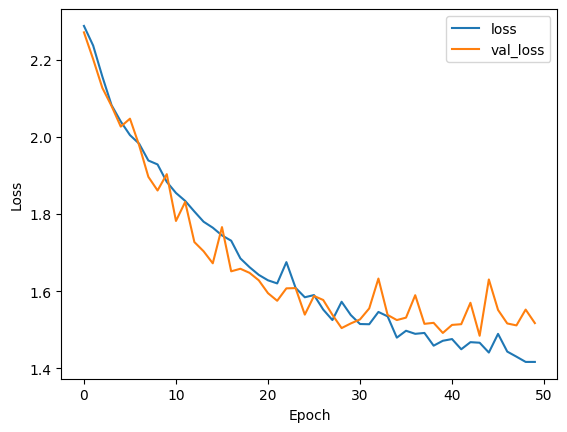

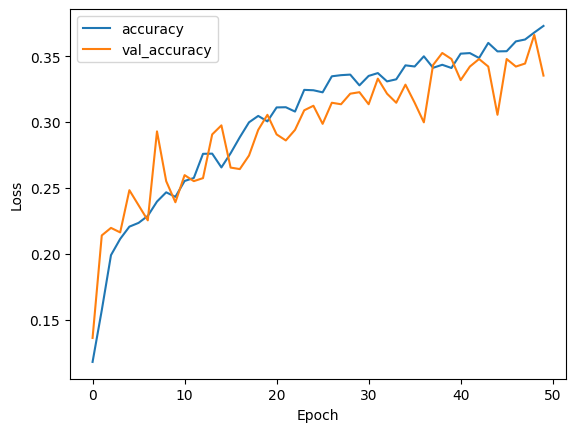

28/28 [==============================] - 0s 3ms/step - loss: 0.7184 - accuracy: 0.8373
model_5 loss: 0.7183761596679688 / accuracy: 0.8373425006866455



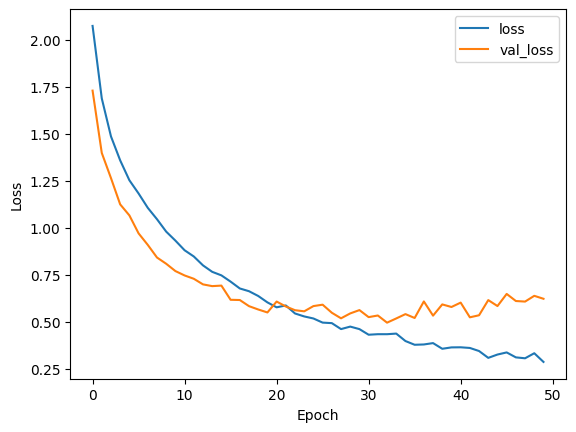

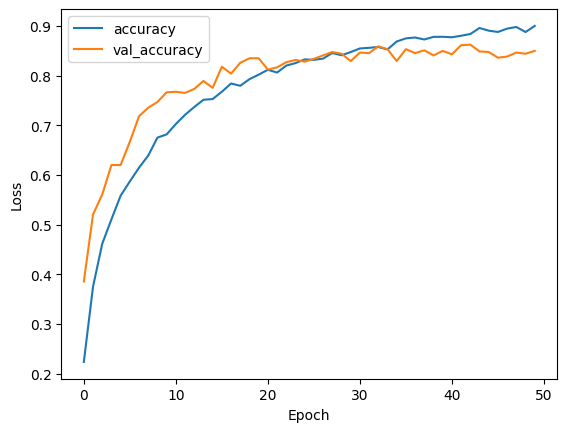

28/28 [==============================] - 0s 3ms/step - loss: 0.8205 - accuracy: 0.8247
model_6 loss: 0.8204736113548279 / accuracy: 0.8247422575950623



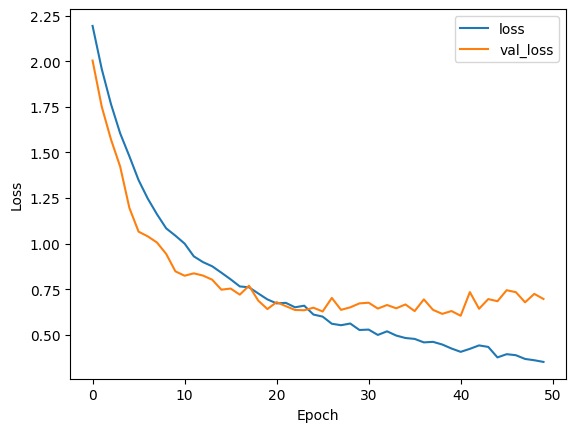

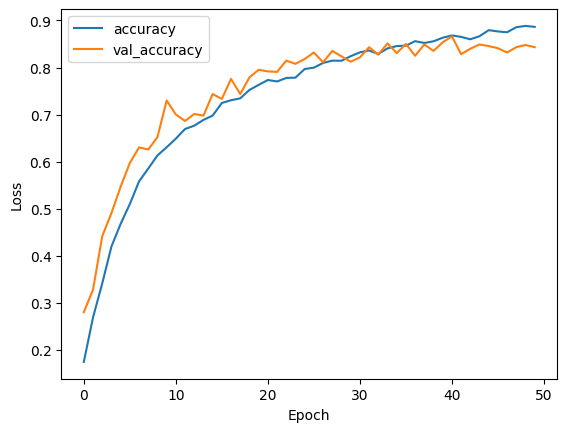

28/28 [==============================] - 0s 4ms/step - loss: 1.0318 - accuracy: 0.7342
model_7 loss: 1.0318351984024048 / accuracy: 0.7342497110366821



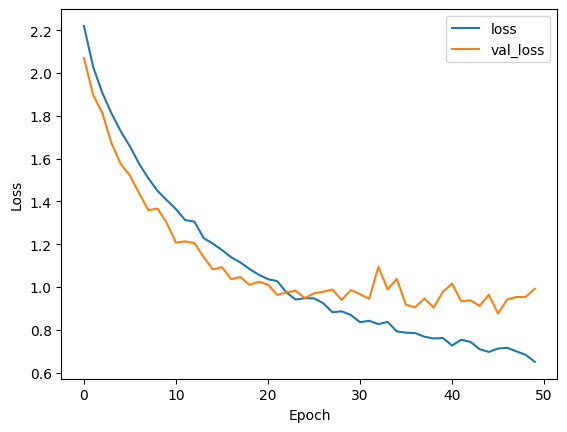

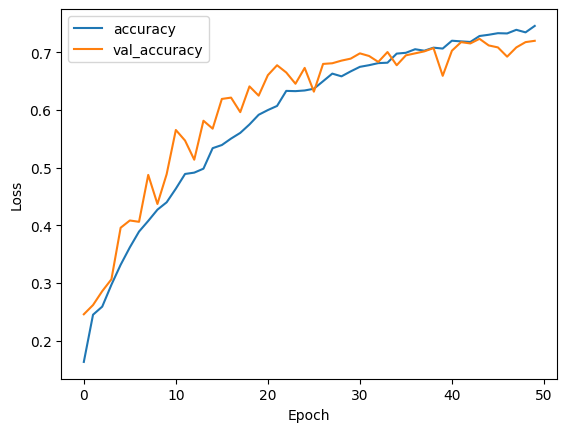

28/28 [==============================] - 0s 4ms/step - loss: 1.2684 - accuracy: 0.5132
model_8 loss: 1.2683846950531006 / accuracy: 0.51317298412323



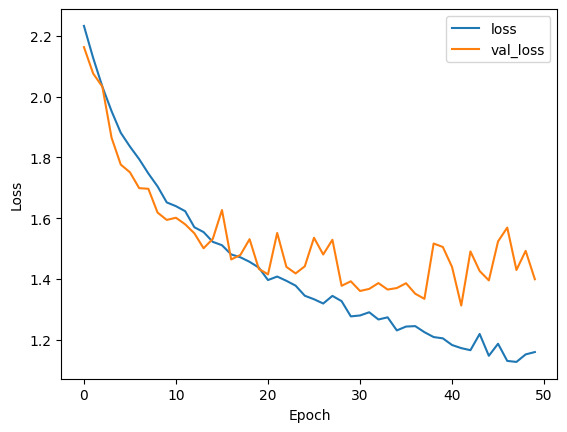

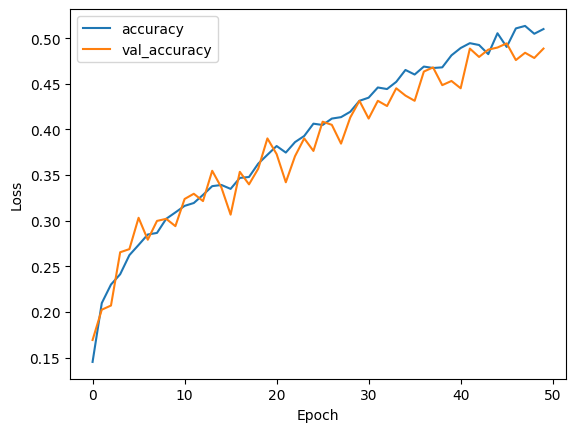

28/28 [==============================] - 0s 3ms/step - loss: 0.6611 - accuracy: 0.8671
model_9 loss: 0.6611360311508179 / accuracy: 0.8671248555183411



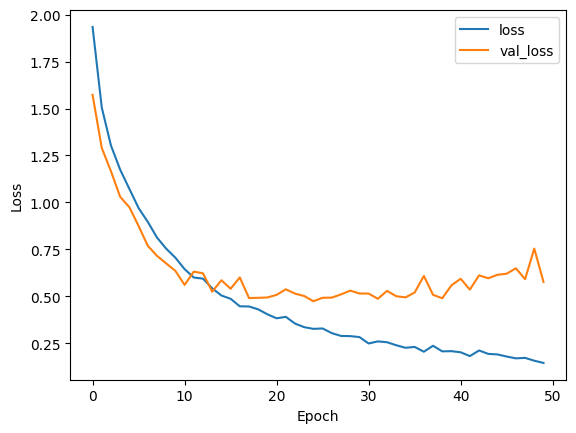

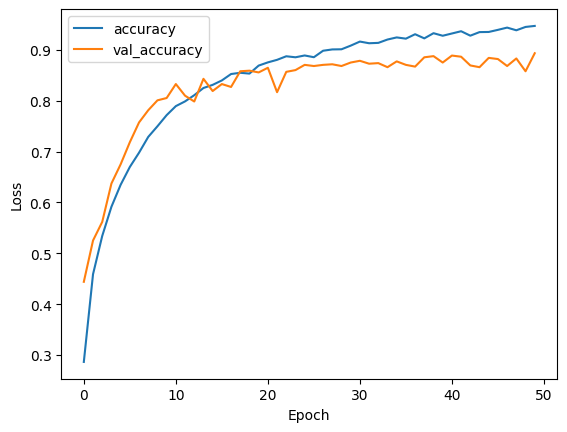

28/28 [==============================] - 0s 3ms/step - loss: 0.7300 - accuracy: 0.8637
model_10 loss: 0.729979395866394 / accuracy: 0.8636884093284607



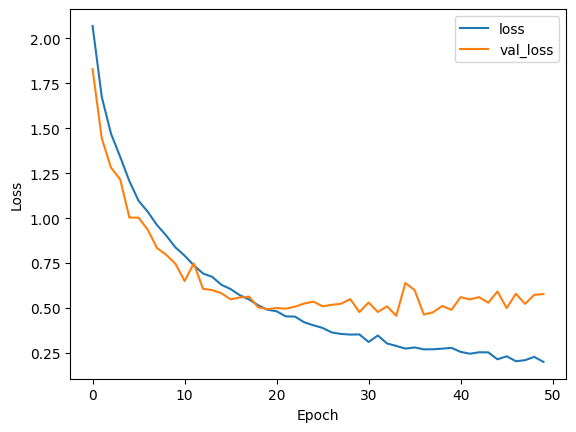

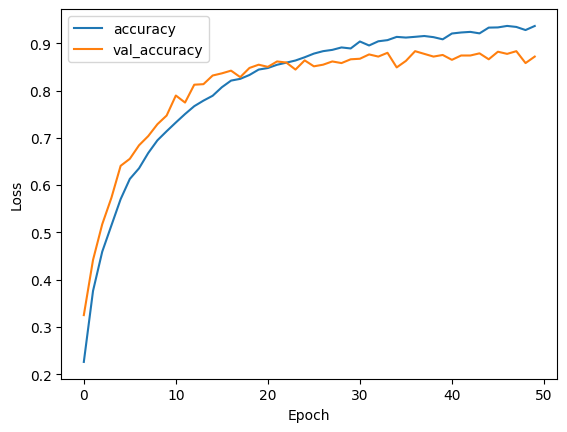

28/28 [==============================] - 0s 4ms/step - loss: 0.8844 - accuracy: 0.8179
model_11 loss: 0.8844175338745117 / accuracy: 0.8178694248199463



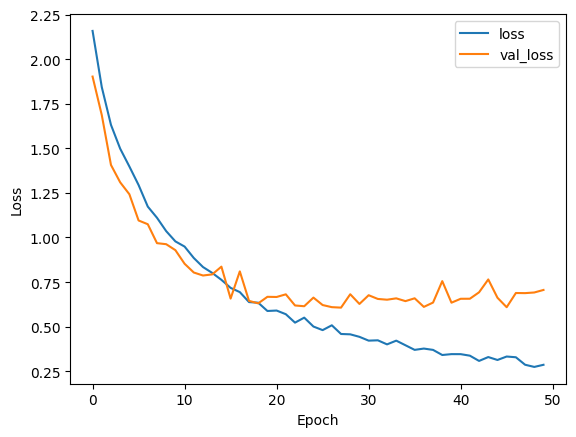

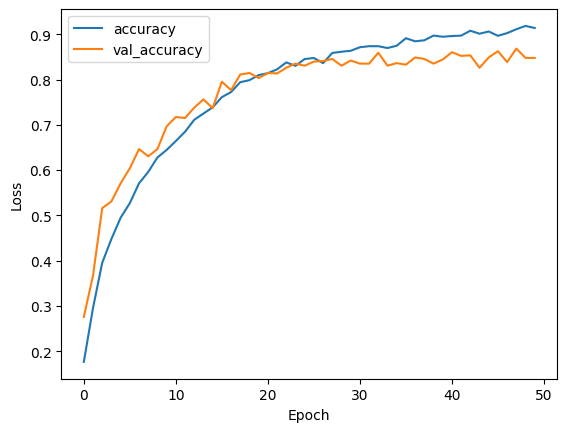

28/28 [==============================] - 0s 4ms/step - loss: 0.8138 - accuracy: 0.7778
model_12 loss: 0.8138471841812134 / accuracy: 0.7777777910232544



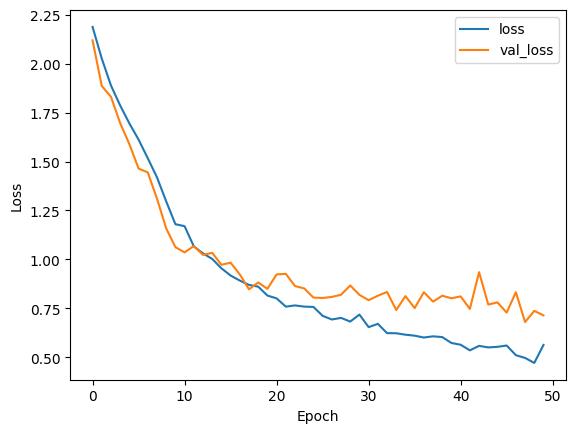

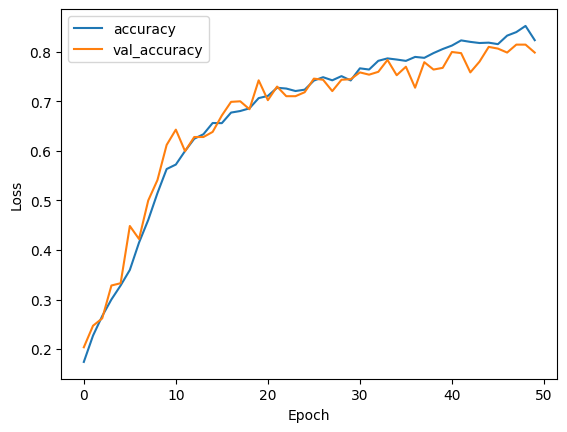

28/28 [==============================] - 0s 3ms/step - loss: 0.6747 - accuracy: 0.8717
model_13 loss: 0.6746823787689209 / accuracy: 0.8717067837715149



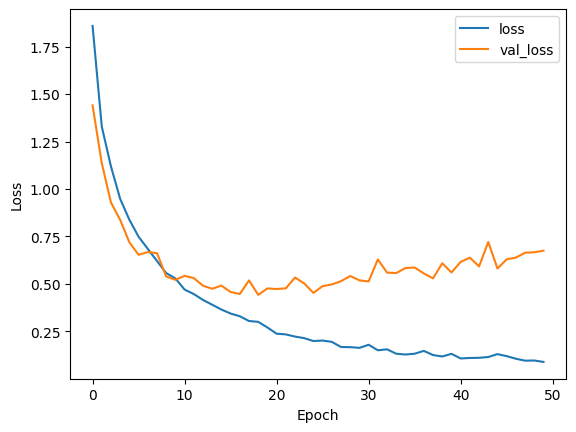

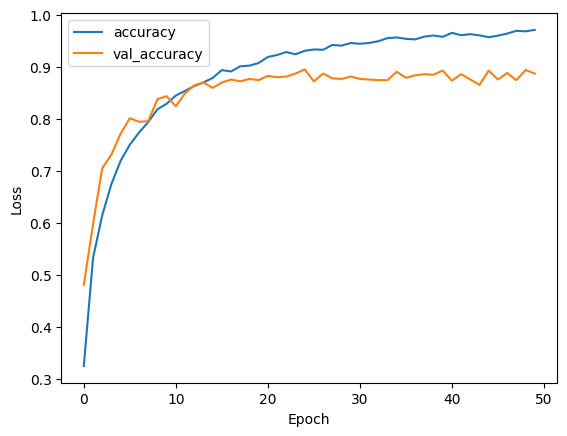

28/28 [==============================] - 0s 3ms/step - loss: 0.6807 - accuracy: 0.8751
model_14 loss: 0.6807017922401428 / accuracy: 0.8751431703567505



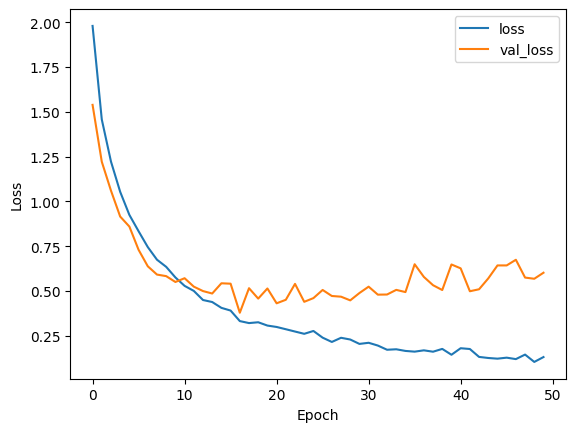

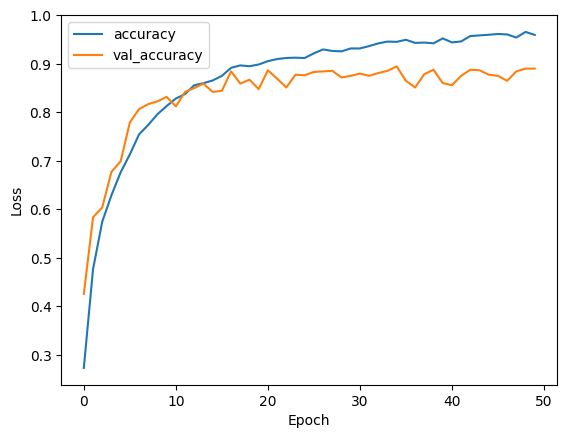

28/28 [==============================] - 0s 4ms/step - loss: 0.7228 - accuracy: 0.8591
model_15 loss: 0.7227932810783386 / accuracy: 0.8591065406799316



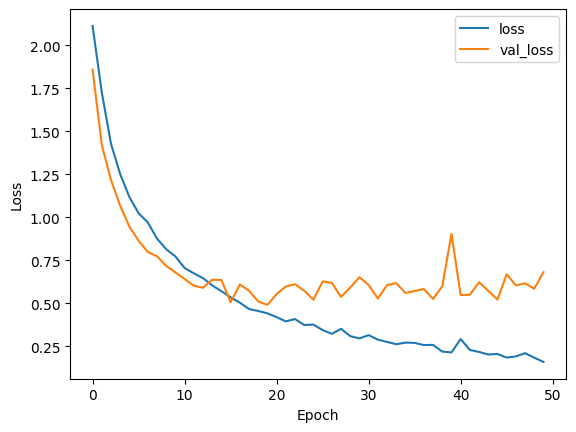

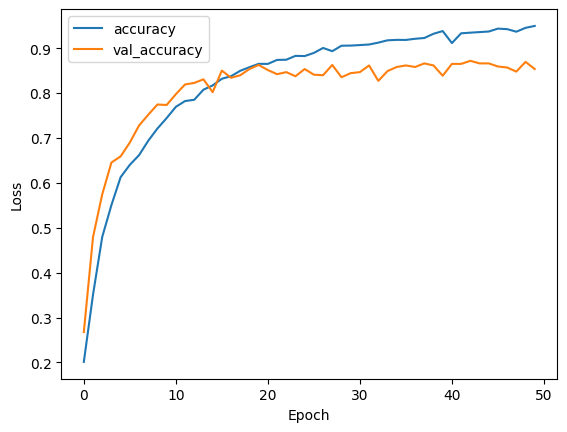

28/28 [==============================] - 0s 4ms/step - loss: 0.9745 - accuracy: 0.8419
model_16 loss: 0.9744927287101746 / accuracy: 0.8419243693351746



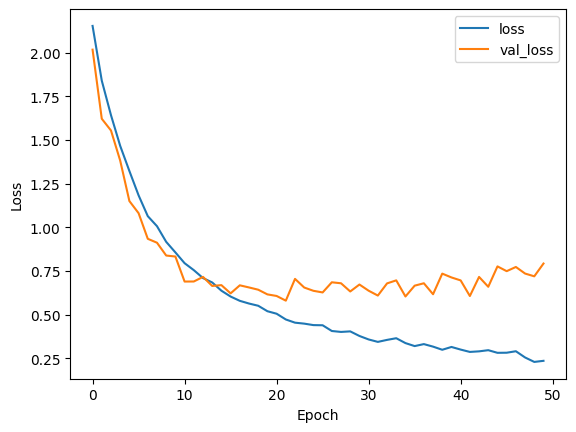

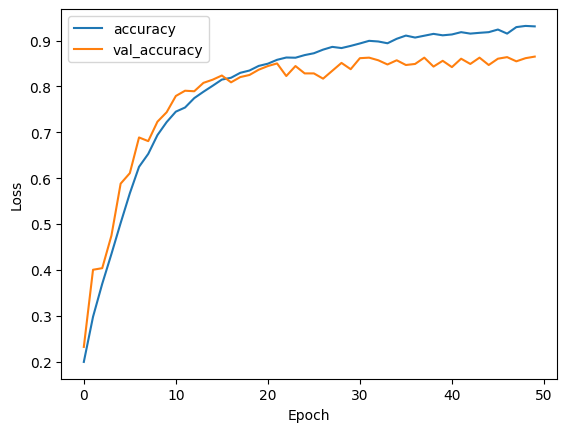

In [ ]:
for i in range (len(models)):
  result = models[i].evaluate(x_test, y_test)
  print(f"model_{i+1} loss: {result[0]} / accuracy: {result[1]}\n")

  plt.plot(history[i].history["loss"], label="loss")
  plt.plot(history[i].history["val_loss"], label="val_loss")

  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.legend()
  plt.show()



  plt.plot(history[i].history["accuracy"], label="accuracy")
  plt.plot(history[i].history["val_accuracy"], label="val_accuracy")

  plt.xlabel("Epoch")
  plt.ylabel("Loss")

  plt.legend()
  plt.show()




In [ ]:
models[13].summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_193 (Conv2D)         (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_192 (MaxPool  (None, 32, 32, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_194 (Conv2D)         (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_193 (MaxPool  (None, 8, 8, 32)          0         
 ing2D)                                                          
                                                                 
 conv2d_195 (Conv2D)         (None, 4, 4, 32)          9248      
                                                                 
 max_pooling2d_194 (MaxPool  (None, 2, 2, 32)        

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score

# Özelleştirilmiş bir işlev tanımlayın, bu işlev belirli bir modeli oluşturacak
def create_model(node, layer_d):
    model = Sequential()

    # Feature extraction kısmı
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding="same", input_shape=(128, 128, 1)))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding="same", activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding="same", activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())

    # Classification kısmı
    for i in range(layer_d):
        model.add(Dense(node, activation="relu"))
        model.add(Dropout(0.5))

    model.add(Dense(10, activation="softmax"))

    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

# Kullanılacak hiperparametre kombinasyonlarını tanımlayın
param_grid = {
    'node': [32, 64, 128, 256],
    'layer_d': [2, 3, 4, 5]
}

# GridSearchCV'yi kullanarak en iyi hiperparametreleri bulun
grid_search = GridSearchCV(estimator=create_model, param_grid=param_grid, cv=3)

# Verilerinizi ve etiketlerinizi kullanarak eğitim verilerini grid_search'e fit edin
grid_search.fit(x_train, y_train)

# En iyi modeli alın
best_model = grid_search.best_estimator_

# En iyi modelin sonuçlarını değerlendirin
y_pred = best_model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'En iyi modelin doğruluk skoru: {accuracy}')